 ![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

# **Reclutamiento de Empleados con Aprendizaje Automático | Colocación Laboral con Python | Sistema de Adquisición de Talento en RR.HH.**

En el mundo acelerado de hoy, las empresas buscan constantemente formas innovadoras para optimizar sus procesos, y la gestión de recursos humanos (RR.HH.) no es una excepción. Los métodos de reclutamiento tradicionales suelen ser consumidores de tiempo y carecen de la eficiencia necesaria para identificar a los mejores candidatos para el trabajo. Sin embargo, con los avances en aprendizaje automático y análisis de datos, los profesionales de RR.HH. ahora tienen herramientas poderosas a su disposición para revolucionar el proceso de reclutamiento.




## **Entendimiento del Proyecto:**
El proyecto está diseñado para aprovechar las técnicas de ML para predecir colocaciones laborales basadas en varios factores, como el rendimiento académico, la experiencia laboral, la especialización, y más.

Al analizar los datos históricos de empleados anteriores, el sistema busca identificar patrones y correlaciones que puedan predecir si un candidato es probable que sea colocado o no.

In [93]:
import numpy as np
import pandas as pd

In [94]:
df = pd.read_csv("https://raw.githubusercontent.com/germaingarcia/Files_Lectures/main/Placement_Data_Full_Class.csv")

In [95]:
# mostramos la estructura del dataframe : head
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## **Diccionario**

1. **Sl_no**: Número de serie o identificador único para cada entrada o persona.
2. **gender**: Género del individuo.
3. **ssc_p**: Porcentaje obtenido en los exámenes de secundaria (SSC suele referirse a Secondary School Certificate).
4. **ssc_b**: Junta o comité organizador de los exámenes de secundaria.
5. **hsc_p**: Porcentaje obtenido en los exámenes de educación superior secundaria (HSC se refiere a Higher Secondary Certificate).
6. **hsc_b**: Junta o comité organizador de los exámenes de educación superior secundaria.
7. **hsc_s**: Especialización o área de estudio en la educación superior secundaria (ciencias, comercio, arte, etc.).
8. **degree_p**: Porcentaje obtenido en el grado universitario.
9. **degree_t**: Tipo de grado o campo de estudio en la educación universitaria (por ejemplo, tecnología, artes, comercio).
10. **workex**: Experiencia laboral (generalmente indicado como 'Yes' o 'No').
11. **etest_p**: Porcentaje obtenido en un examen de prueba, posiblemente un examen de empleabilidad o habilidades específicas.
12. **specialisation**: Especialización en estudios de posgrado, especialmente en programas de MBA.
13. **mba_p**: Porcentaje obtenido en el programa de MBA.
14. **status**: Estado del empleo o resultado del proceso de selección (como 'employed' o 'unemployed').
15. **salary**: Salario ofrecido o actual del individuo.



In [96]:
#Analizamos que variables no ayudan y lo eliminamos: 'ssc_b','hsc_b','hsc_s','degree_t','salary'
#Código aquí
############# Agregar primera columna identificadora 'sl_no'
columns_to_drop = ['sl_no', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'salary']
df = df.drop(columns=columns_to_drop)
df

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,77.60,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,60.00,72.00,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,67.00,73.00,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,66.00,58.00,No,70.0,Mkt&HR,60.23,Placed


## Preprocessing

## Encoding

 Limpiar y preparar el conjunto de datos para el análisis. Esto incluye manejar valores faltantes, codificar variables categóricas y escalar características numéricas.

In [97]:
# codigica genero, experiencia de trabajo, estatus y especialización
# Puedes usar esta celda como punto de partida
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# List of columns to encode
columns_to_encode = ['gender', 'workex', 'status', 'specialisation']

# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

df

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,77.60,0,91.0,0,74.49,1
211,1,58.00,60.00,72.00,0,74.0,0,53.62,1
212,1,67.00,67.00,73.00,1,59.0,0,69.72,1
213,0,74.00,66.00,58.00,0,70.0,1,60.23,1


# Balance Dataset


In [98]:
df['status'].value_counts()

status
1    148
0     67
Name: count, dtype: int64

In [99]:
from sklearn.utils import resample

# Separar la clase minoritaria de la clase mayoritaria

df_status_majority = df[df['status'] == 1]
df_status_minority = df[df['status'] == 0]

# Adicionar elementos de la clase minoritaria

df_status_minority_upsampled = resample(
    df_status_minority,
    replace=True,
    n_samples=len(df_status_majority),
    random_state=42
)

# Combinar clases mayoritarias y clases minoritarias en la variable balanced_data
balanced_data = pd.concat([df_status_majority, df_status_minority_upsampled])

In [100]:
balanced_data['status'].value_counts()

status
1    148
0    148
Name: count, dtype: int64

# Train Test Split

In [101]:
# Separación de feature y target
X = balanced_data.copy().drop('status', axis=1)
y = balanced_data['status']


In [102]:
#Train Test Split con test_size=0.3
from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test =
# Puedes usar esta celda como punto de partida

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# Feature Scaling

In [103]:
# scalar las características de x_train y x_test
from sklearn.preprocessing import MinMaxScaler
# Puedes usar esta celda como punto de partida

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1 k-nearest neighbor

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the performance using accuracy and classification report
accuracy = accuracy_score(y_test, y_pred_knn)
classification_rep = classification_report(y_test, y_pred_knn)

# Print evaluation results
print("\nAccuracy of KNeighborsClassifier:", accuracy)
print("\nClassification Report:")
print(classification_rep)


Accuracy of KNeighborsClassifier: 0.8539325842696629

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        39
           1       0.89      0.84      0.87        50

    accuracy                           0.85        89
   macro avg       0.85      0.86      0.85        89
weighted avg       0.86      0.85      0.85        89



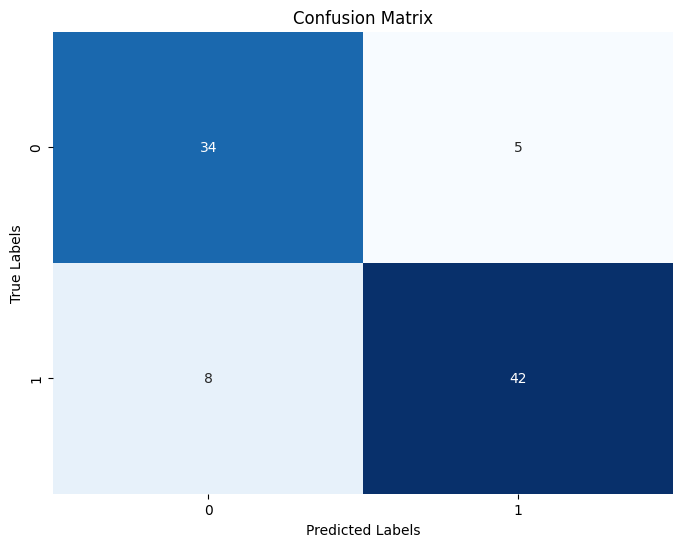

In [105]:
# Matriz de confusión heatmap KNN
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred_knn)

# Create a DataFrame from the confusion matrix for better visualization with seaborn
conf_mat_df = pd.DataFrame(conf_mat, index=y_test.unique(), columns=y_test.unique())

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Decision Tree

In [106]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

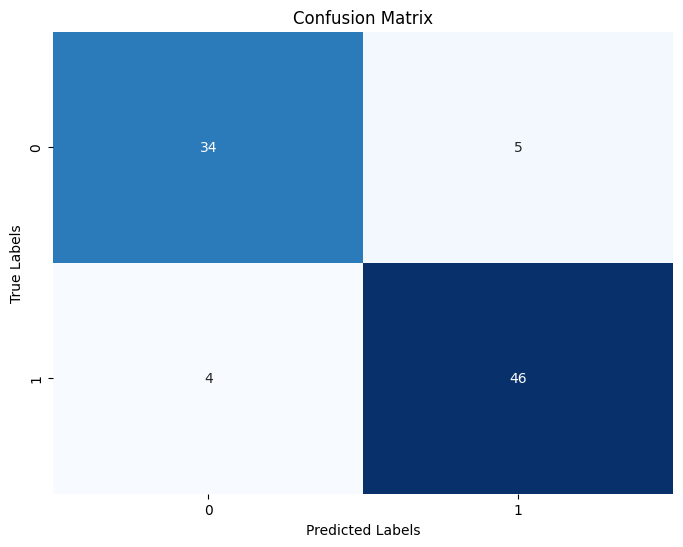

In [107]:
# creating confusion matrix heatmap (Decision Tree)
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
conf_mat_df_dt = pd.DataFrame(conf_mat_dt, index=y_test.unique(), columns=y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_df_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# SVM

In [108]:
# Support Vector Machine
from sklearn.svm import SVC

svc = SVC(random_state=42)

svc.fit(X_train_scaled, y_train)

y_pred_svc = svc.predict(X_test_scaled)

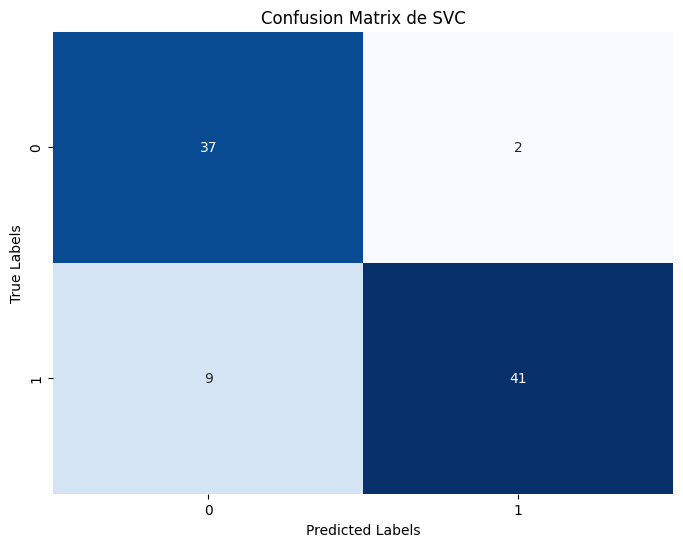

In [109]:
# creating confusion matrix heatmap SVM
conf_mat_svc = confusion_matrix(y_test, y_pred_svc)

conf_mat_df_svc = pd.DataFrame(conf_mat_svc, index=y_test.unique(), columns=y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_df_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix de SVC")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

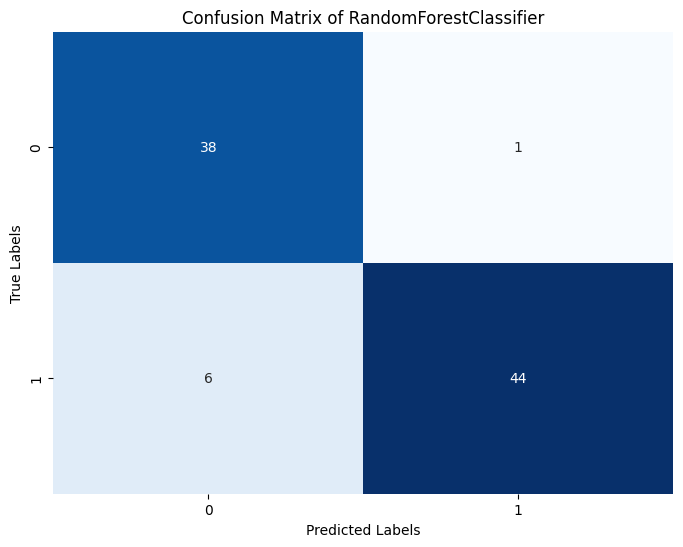

In [111]:
# creating confusion matrix heatmap - Random Forest

conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

conf_mat_df_rf = pd.DataFrame(conf_mat_rf, index=y_test.unique(), columns=y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_df_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix of RandomForestClassifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Gaussian Naive Bayes

In [112]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_scaled, y_train)

y_pred_gnb = gnb.predict(X_test_scaled)

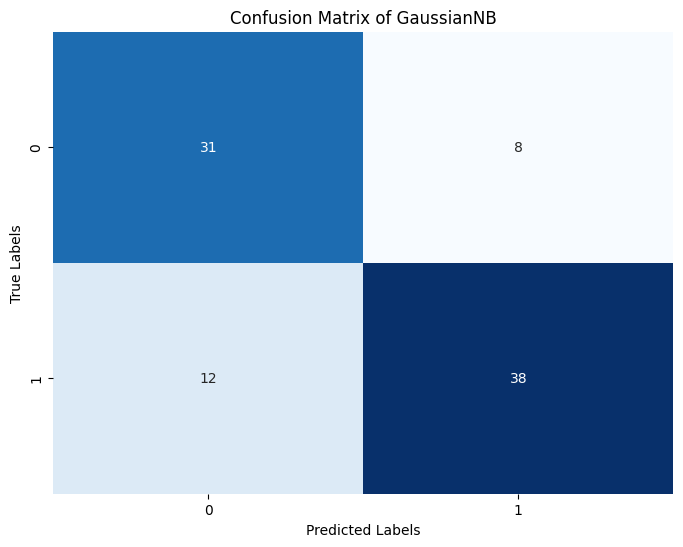

In [113]:
conf_mat_gnb = confusion_matrix(y_test, y_pred_gnb)

conf_mat_df_gnb = pd.DataFrame(conf_mat_gnb, index=y_test.unique(), columns=y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_df_gnb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix of GaussianNB")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, max_iter=200)

log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)

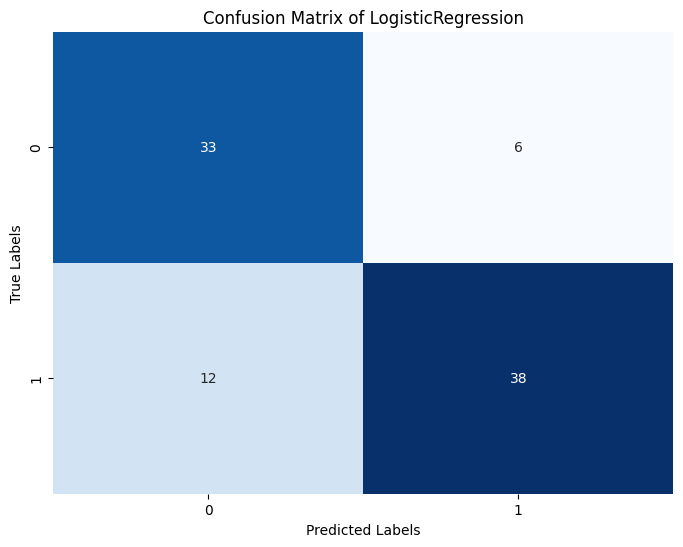

In [115]:
conf_mat_log_reg = confusion_matrix(y_test, y_pred_log_reg)

conf_mat_df_log_reg = pd.DataFrame(conf_mat_log_reg, index=y_test.unique(), columns=y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_df_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix of LogisticRegression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [116]:
# compare all models

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    # model : y_pred
    "KNeighbors": y_pred_knn,
    "DecisionTree": y_pred_dt,
    "RandomForest": y_pred_rf,
    "GaussianNB": y_pred_gnb,
    "SVC": y_pred_svc,
    "LogisticRegression": y_pred_log_reg
}

# Initialize an empty list to hold performance metrics
performance_data = []

# Loop through each model to train, predict, and compute the metrics
for name, y_pred in models.items():
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the results to the performance data list
    performance_data.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# Create a DataFrame from the performance data for easier visualization
performance_df = pd.DataFrame(performance_data)

# Print the DataFrame to see the comparison
print(performance_df)

                Model  Accuracy  Precision    Recall  F1-Score
0          KNeighbors  0.853933   0.856767  0.853933  0.854379
1        DecisionTree  0.898876   0.898795  0.898876  0.898720
2        RandomForest  0.921348   0.927761  0.921348  0.921648
3          GaussianNB  0.775281   0.780007  0.775281  0.776080
4                 SVC  0.876404   0.888135  0.876404  0.876842
5  LogisticRegression  0.797753   0.806537  0.797753  0.798521


## Single Input Predictions

Test si está prediciendo adecuadamente

In [127]:
# El modelo con mejores metricas es el random forest

predicted_value = rf.predict([X_test.iloc[3]])
actual_value = y_test.iloc[3]

print(f"Predicted Class: {predicted_value[0]}")
print(f"Actual Class: {actual_value}")

Predicted Class: 1
Actual Class: 1


# Sistema de Predicción

In [122]:
def prediction(gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):
    gender = 0 if "F" else 0
    workex = 1 if "Yes" else 0
    specialisation = 0 if "Mkt&Fin" else 1
    data = [[gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p]]
    prediction = dt.predict(data)
    return prediction

In [123]:
gender = "F"
ssc_p =58.
hsc_p = 61.
degree_p = 60.
workex = "Yes"
etest_p = 62.
specialisation = "Mkt&Fin"
mba_p = 60.85

result = prediction(gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p)[0]
# print (result)
if result == 1:
    print('contratado')

else:
    print('No Contratado')

No Contratado



Se emplea un modelo de Clasificador Random Forest para predecir las colocaciones laborales basadas en características de entrada como los puntajes académicos, la experiencia laboral y otros factores relevantes. El modelo se entrena con datos históricos para aprender patrones y hacer predicciones precisas.

# Guardar Archivos

In [128]:
import pickle
pickle.dump(dt,open('model.pkl','wb'))
# pickle.dump(le,open('encoder.pkl','wb'))
# pickle.dump(sc,open('standscaler.pkl','wb'))